<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task6/blob/main/Assignment_6(Brain_vs_Body_Weight).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Brain vs. Body Weight**

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [ ]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df=df.drop_duplicates()
df.shape

(62, 2)

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
X = df[['Body']].values #feature
y = df['Brain'].values  #target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
X_train.shape, X_test.shape

((49, 1), (13, 1))

**Task1:** Find the linear regression equation for this data.

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
bb_regressor=LinearRegression()
bb_regressor.fit(X_train,y_train)


LinearRegression()

In [ ]:
#finding the values of m and c
coefficient= bb_regressor.coef_
intercept= bb_regressor.intercept_
coefficient

array([0.90563559])

In [ ]:
#printing the linear regression equation y=mx+c
print("Linear Regression Equation: y = {:.2f} * x + {:.2f}".format(coefficient[0], intercept))

Linear Regression Equation: y = 0.91 * x + -59.13


In [ ]:
y_pred = bb_regressor.predict(X_test) 
y_pred

array([-55.50928564, -58.76957378, 235.19974019, 308.55622335,
        45.01626535, 534.05948638,  -6.60496354, -47.99251021,
       -56.95830259, -58.22619243, 556.70037624, -56.86773903,
       -54.15083225])

In [59]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


**Task2:** Chart the original data and the equation on the chart.

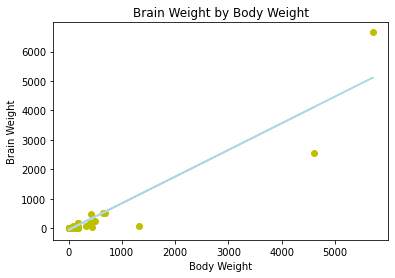

In [ ]:
plt.scatter(X, y, color='y')
plt.plot(X, bb_regressor.predict(X),color='lightblue')
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()


**Task 3:** Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.

In [ ]:
#print('R2- SCORE:', bb_regressor.score(X,y))
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
bb_regressor.score(X_test,y_test) 

R2- SCORE: 0.876609773835019


0.876609773835019

R2-score is **0.876** which is greater than 0.8, so this model is a good fit for the data